In [1]:
import math
import csv
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
def load_data():
    data=[]
    with open("./data.csv",'r') as file:
        reader=csv.reader(file)
        for row in reader:
            data.append(row)

    
    return data

In [3]:
def preprocess_data(data):
    result=[]   
    
    
    temp=np.transpose(data)
    
    bool_columns = ['has_basement', 'renovated', 'nice_view', 'perfect_condition', 
                    'has_lavatory', 'single_floor']
    
    for col in temp:
        if(col[0]=='date'):
            continue 
        else:
            if(col[0] in bool_columns):
                feature_col=[]
                for cell in col:
                    feature_col.append(1 if cell == "True" else 0)
                
                result.append(feature_col[1:])
                    
            else:
                result.append(col[1:])
    
    
    
    return np.transpose(result)


In [4]:
class LinearRegression:
    def __init__(self,learning_rate=0.00001,epochs=1000,step=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.step=step
    
    
    def fit(self, X, Y):
        plot=[]
        
        no_of_training_examples, no_of_features= np.shape(X)
        
        self.theta = np.zeros(no_of_features + 1, dtype=float)  
        X = np.c_[np.ones(no_of_training_examples), X]
        
        X = X.astype(float)
                
        print(Y)
        for i in range(self.epochs):
            y_pred = np.dot(X, self.theta)
            cost= self.mean_squared_error(Y,y_pred)
            
            print("epoch = ",i, " cost = ",cost)
            if(i % self.step ==0):
              plot.append([i,cost])
                                   
            gradient=(1/no_of_training_examples) * np.dot(np.transpose(X),(y_pred-Y))
           
            self.theta -= self.learning_rate * gradient
            
        return plot
               
    def predict(self, X):
        no_of_training_examples, _no_of_features= np.shape(X)
        X = np.c_[np.ones(no_of_training_examples), X]
        
        X = X.astype(float)
        
        print(np.shape(self.theta))
        print(np.shape(X))
       
        return X.dot(self.theta)

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

In [21]:
data_set=load_data()

data=preprocess_data(data_set)

print(data)

x = np.array(data[:, 1:]) 
y = np.array(data[:, 0])

y=y.astype("float")

model=LinearRegression(learning_rate=0.0000001, epochs=100000,step=100)
plot=model.fit(x,y)

y_pred = model.predict(x)
mse = model.mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)
print("Model parameters:", model.theta)

[['312000.0' '2' '2' ... '0' '5' '1']
 ['310000.0' '2' '2' ... '0' '11' '3']
 ['320000.0' '2' '2' ... '1' '12' '2']
 ...
 ['625504.0' '2' '3' ... '0' '7' '4']
 ['730000.0' '3' '5' ... '0' '11' '4']
 ['383000.0' '3' '3' ... '0' '8' '1']]
[312000. 310000. 320000. ... 625504. 730000. 383000.]
epoch =  0  cost =  268876620244.79092
epoch =  1  cost =  267071311969.158
epoch =  2  cost =  265279591523.94986
epoch =  3  cost =  263501356638.62405
epoch =  4  cost =  261736505812.39047
epoch =  5  cost =  259984938308.4177
epoch =  6  cost =  258246554148.08286
epoch =  7  cost =  256521254105.26508
epoch =  8  cost =  254808939700.68155
epoch =  9  cost =  253109513196.26627
epoch =  10  cost =  251422877589.5914
epoch =  11  cost =  249748936608.33023
epoch =  12  cost =  248087594704.76196
epoch =  13  cost =  246438757050.31802
epoch =  14  cost =  244802329530.1692
epoch =  15  cost =  243178218737.85342
epoch =  16  cost =  241566331969.94443
epoch =  17  cost =  239966577220.7602
epoch

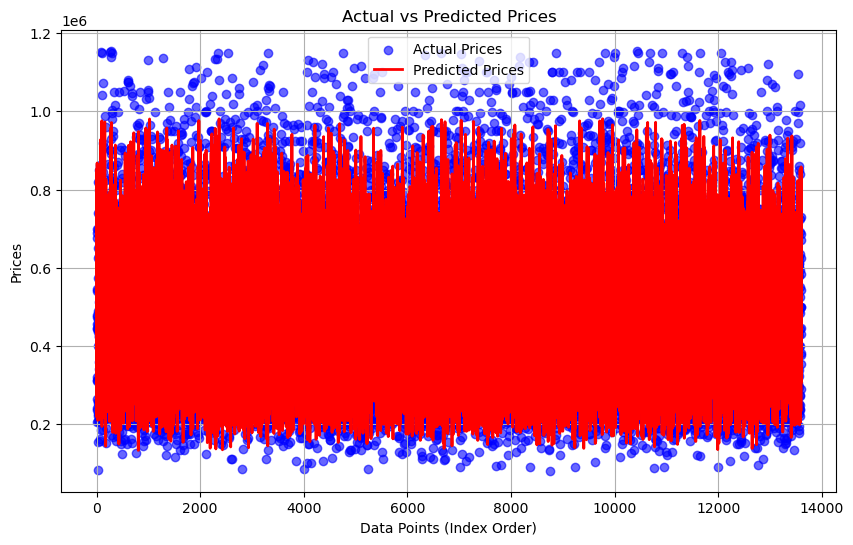

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Actual Prices', alpha=0.6)

# Plot predicted prices as a line plot to overlap with actual prices
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Prices', linewidth=2)

# Label the axes
plt.xlabel("Data Points (Index Order)")
plt.ylabel("Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()

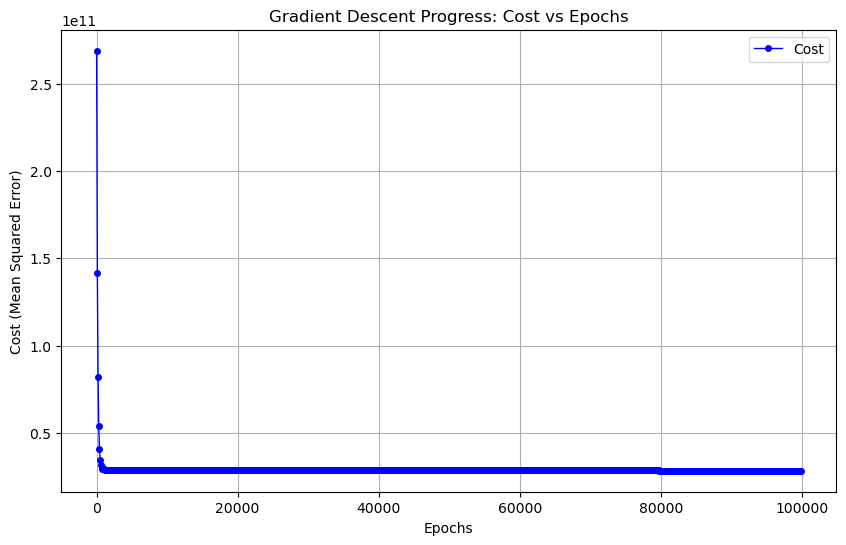

In [23]:
epochs = [point[0] for point in plot]
costs = [point[1] for point in plot]

# Plotting Epochs vs Cost
plt.figure(figsize=(10, 6))
plt.plot(epochs, costs, color='blue', marker='o', linestyle='-', linewidth=1, markersize=4, label="Cost")

plt.xlabel("Epochs")
plt.ylabel("Cost (Mean Squared Error)")
plt.title("Gradient Descent Progress: Cost vs Epochs")
plt.legend()
plt.grid(True)
plt.show()